In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/bank-additional/bank-additional/bank-additional-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Input variables
**Bank client data:**

* **age** (numeric)
* **job:** type of job (categorical)
* **marital:** marital status (categorical)
* **education** (categorical)
* **default:** has credit in default? (categorical)
* **housing:** has housing loan? (categorical)
* **loan:** has personal loan? (categorical)

**Related with the last contact of the current campaign:**

* **contact:** contact communication type (categorical)
* **month:** last contact month of year (categorical)
* **day_of_week:** last contact day of the week (categorical)
* **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

* **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* **previous:** number of contacts performed before this campaign and for this client (numeric)
* **poutcome:** outcome of the previous marketing campaign (categorical)

**Social and economic context attributes:**

* **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
* **cons.price.idx:** consumer price index - monthly indicator (numeric)
* **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)
* **euribor3m:** euribor 3 month rate - daily indicator (numeric)
* **nr.employed:** number of employees - quarterly indicator (numeric)

**Output variable** (desired target)
* **y:** has the client subscribed a term deposit? (binary: 'yes','no')

### Exploratory Data Analysis (EDA)

In [3]:
df.shape

(41188, 21)

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.duplicated().sum()

12

In [6]:
df = df.drop_duplicates()
df.shape

(41176, 21)

In [7]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [8]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
df[df['job']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,unknown,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,unknown,married,unknown,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,unknown,divorced,high.school,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,59,unknown,married,unknown,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,unknown,married,unknown,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,unknown,divorced,unknown,unknown,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes
41005,63,unknown,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no


In [10]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [11]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [12]:
df['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [13]:
df['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [14]:
df['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

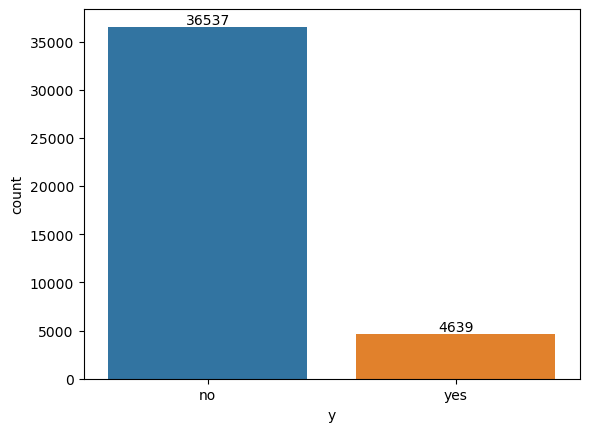

In [16]:
ax = sns.countplot(data = df, x = 'y')

for i in ax.containers:
    ax.bar_label(i)

*We can see that the data is highly imbalanced.*

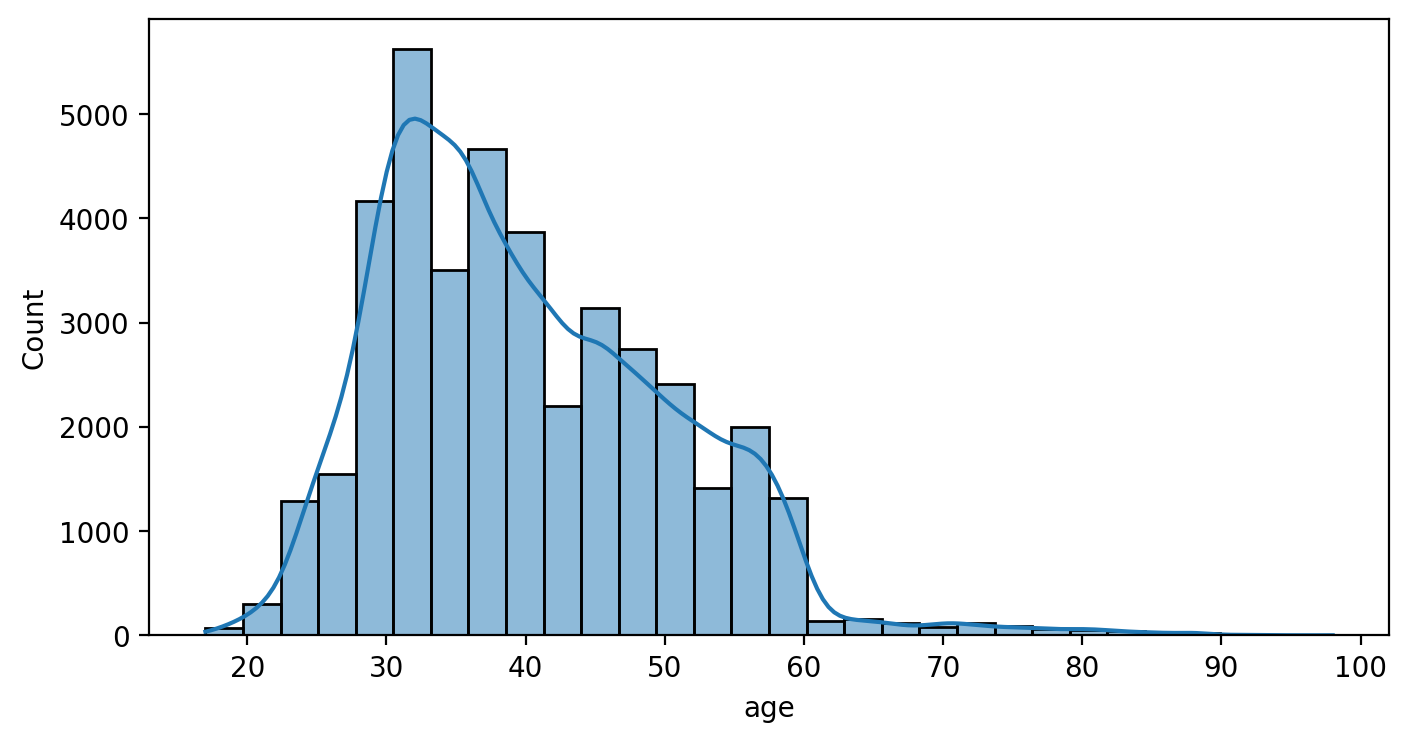

In [17]:
plt.figure(figsize = (8,4), dpi = 200)
sns.histplot(data = df, x=  'age', bins = 30, kde = True);

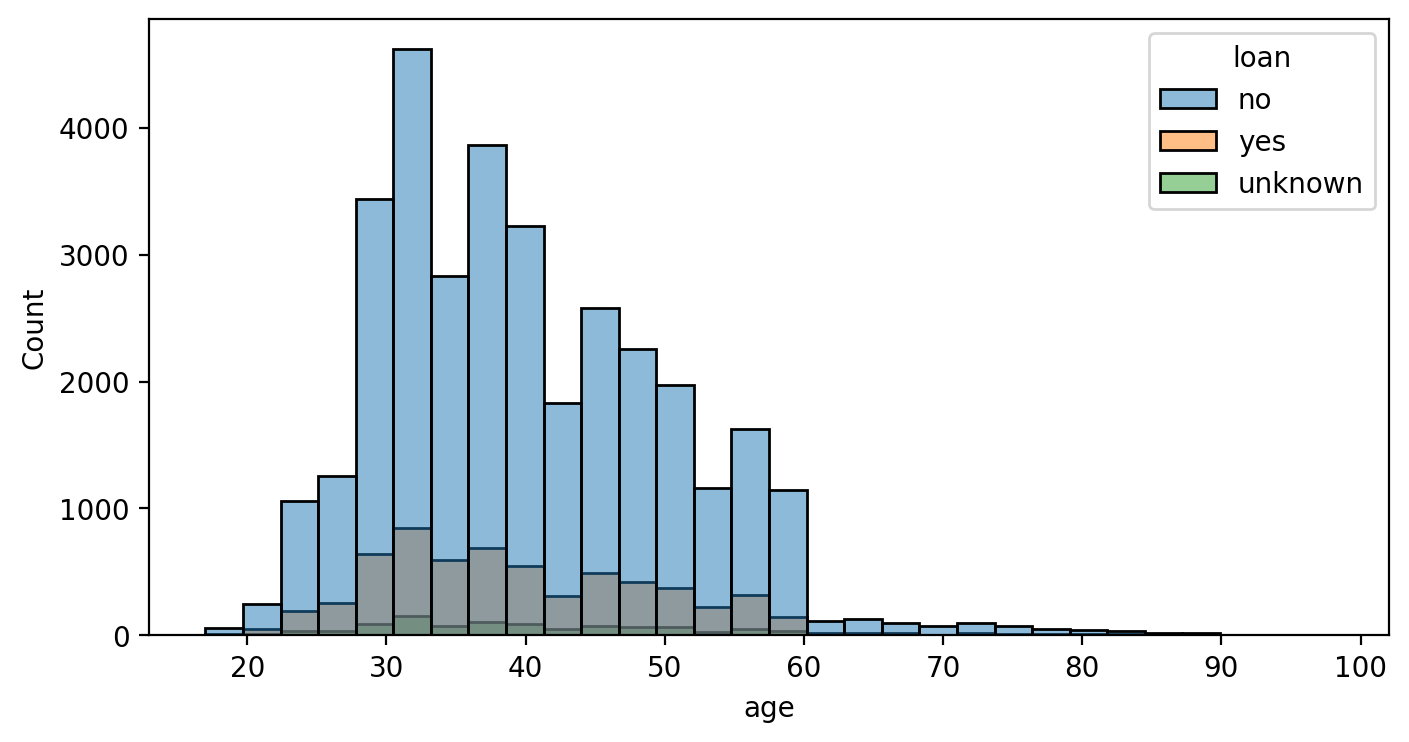

In [18]:
plt.figure(figsize = (8,4), dpi= 200)
sns.histplot(data = df, x = 'age', bins = 30, hue = 'loan');

In [19]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='pdays', ylabel='Count'>

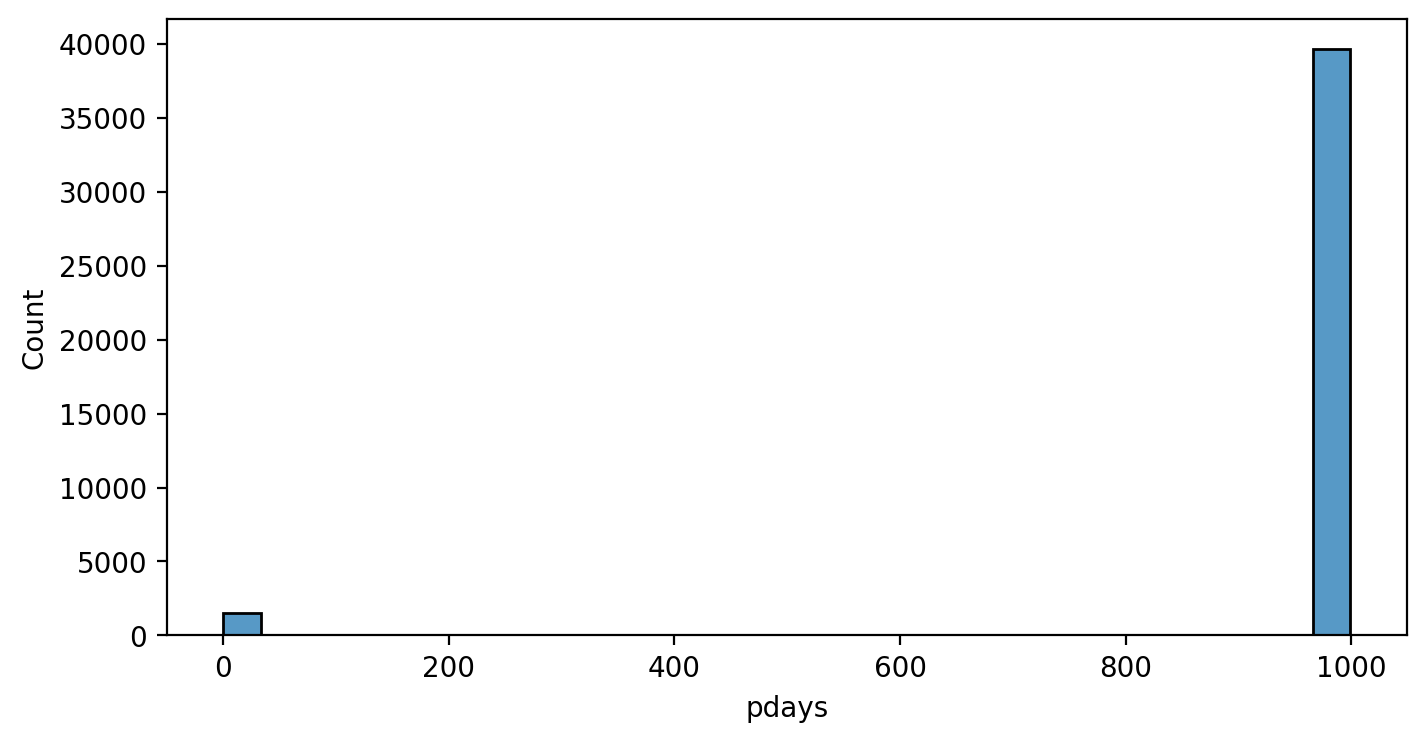

In [20]:
plt.figure(figsize = (8,4), dpi = 200)
sns.histplot(data = df, x = 'pdays', bins = 30)

*From the above the graph we can see that most of the people have not been contacted in last campaign.*

<Axes: xlabel='pdays', ylabel='Count'>

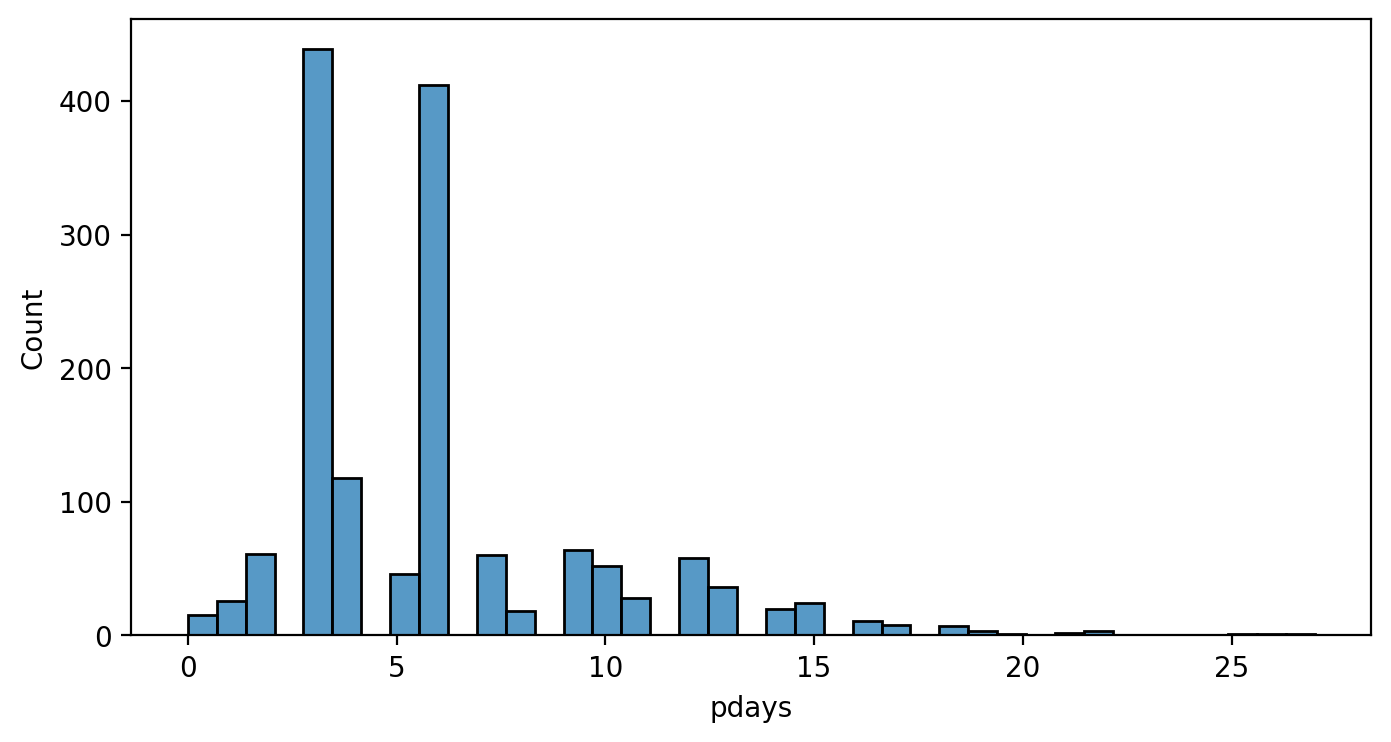

In [21]:
plt.figure(figsize = (8,4), dpi = 200)
sns.histplot(data = df[df['pdays']!=999], x = 'pdays')

In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<Axes: xlabel='contact', ylabel='count'>

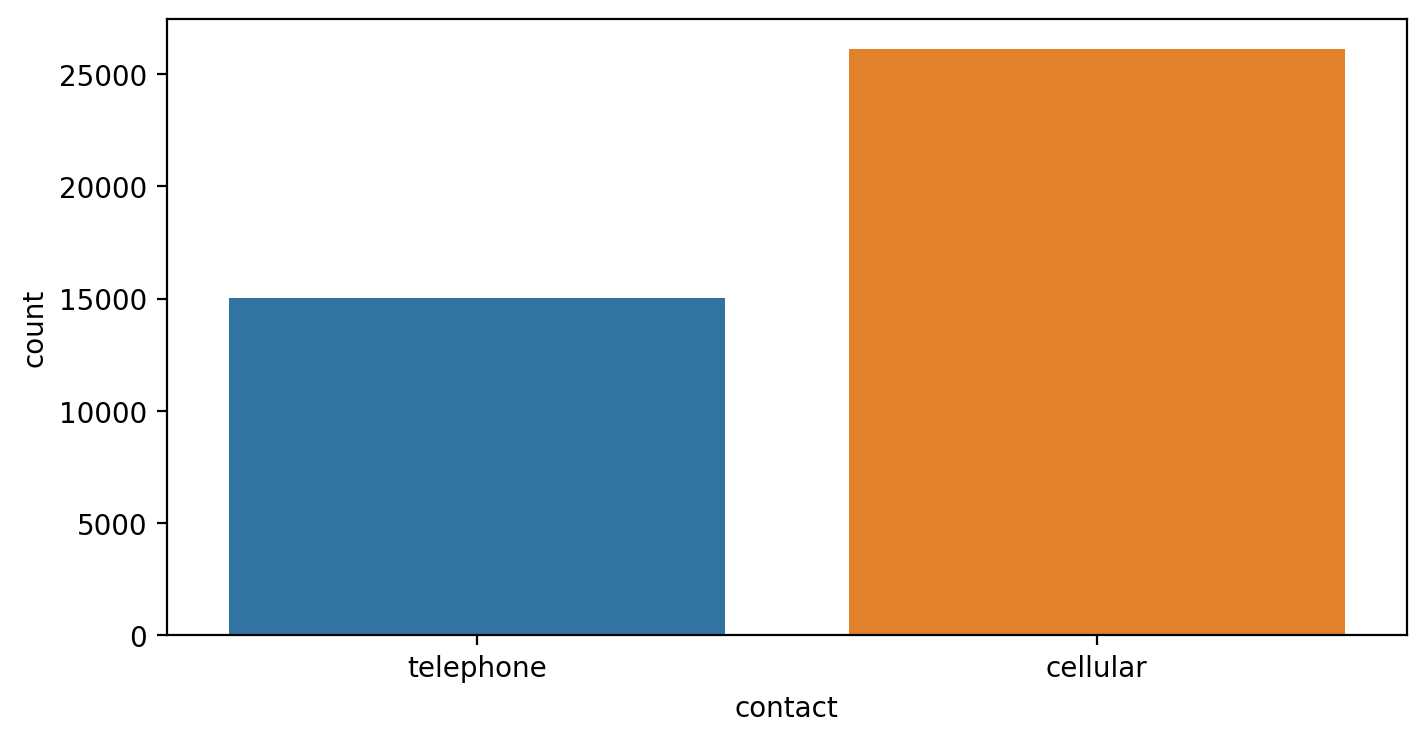

In [23]:
plt.figure(figsize = (8,4), dpi = 200)
sns.countplot(data = df, x= 'contact')

*We can see the general trend in the above graph. Most people tend to have their personal cellular phone instead of a telephone.*

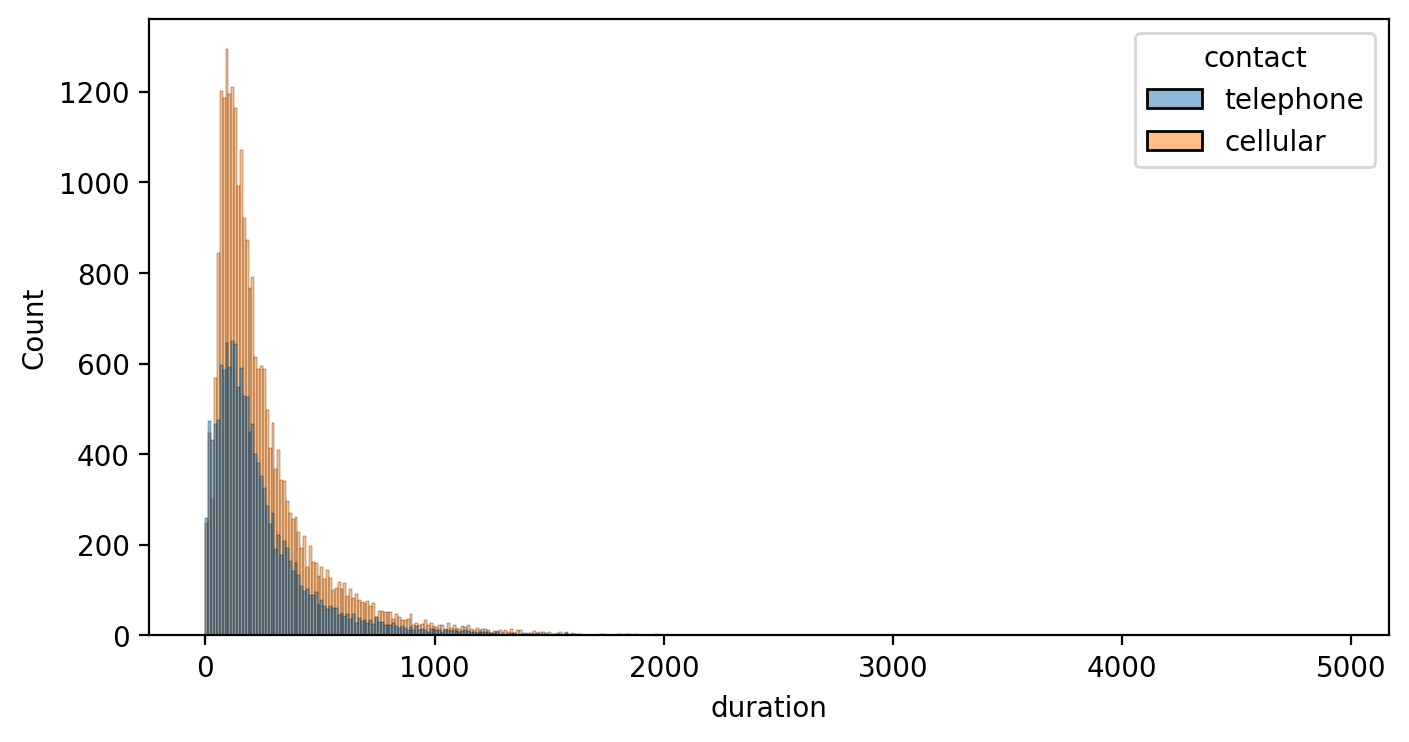

In [24]:
plt.figure(figsize= (8,4), dpi = 200)
sns.histplot(data = df, x= 'duration', hue = 'contact');

*Duration of most of the call lasted for around 1000 seconds (i.e, 15 to 16 minutes). And it is acceptable since no customer will talk for more than that time.*

(0.0, 1000.0)

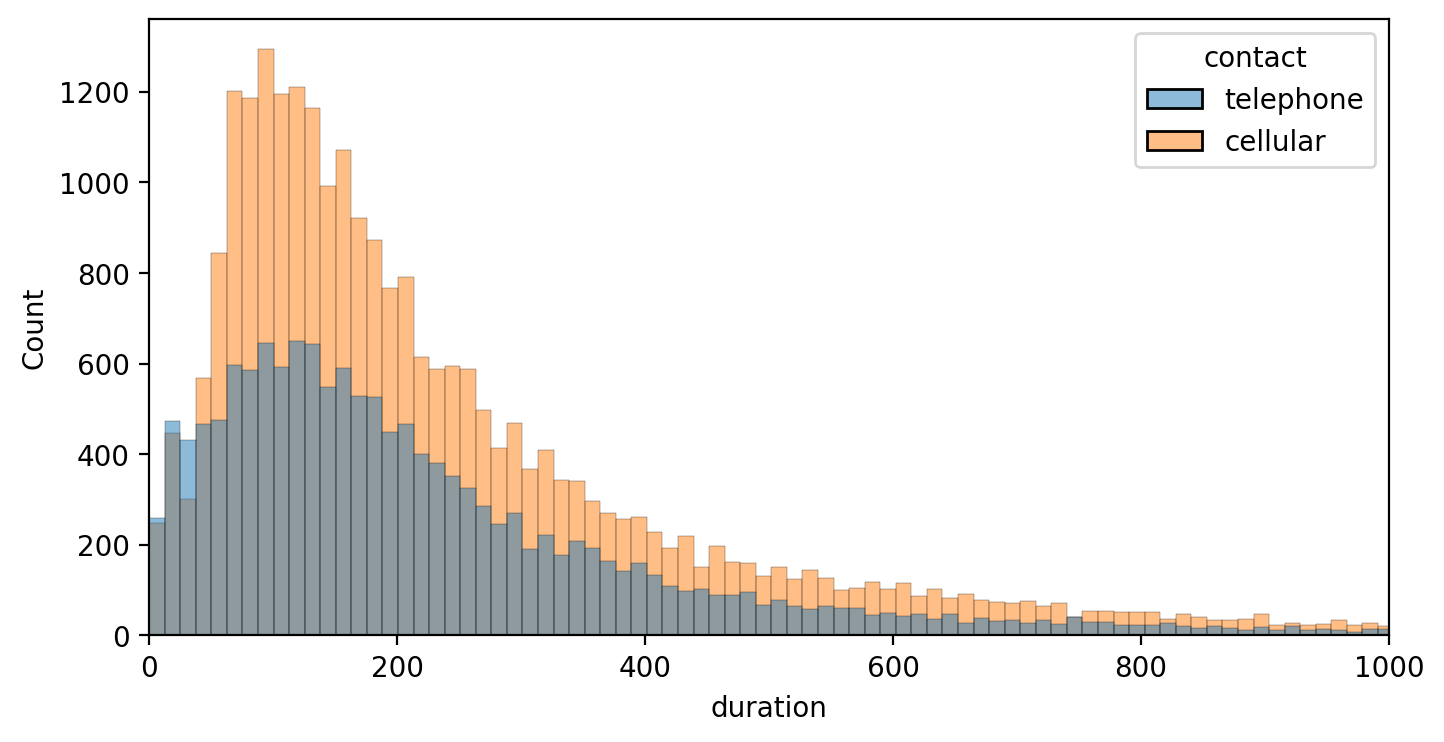

In [25]:
plt.figure(figsize=(8,4), dpi = 200)
sns.histplot(data = df, x= 'duration', hue = 'contact')
plt.xlim(0,1000)

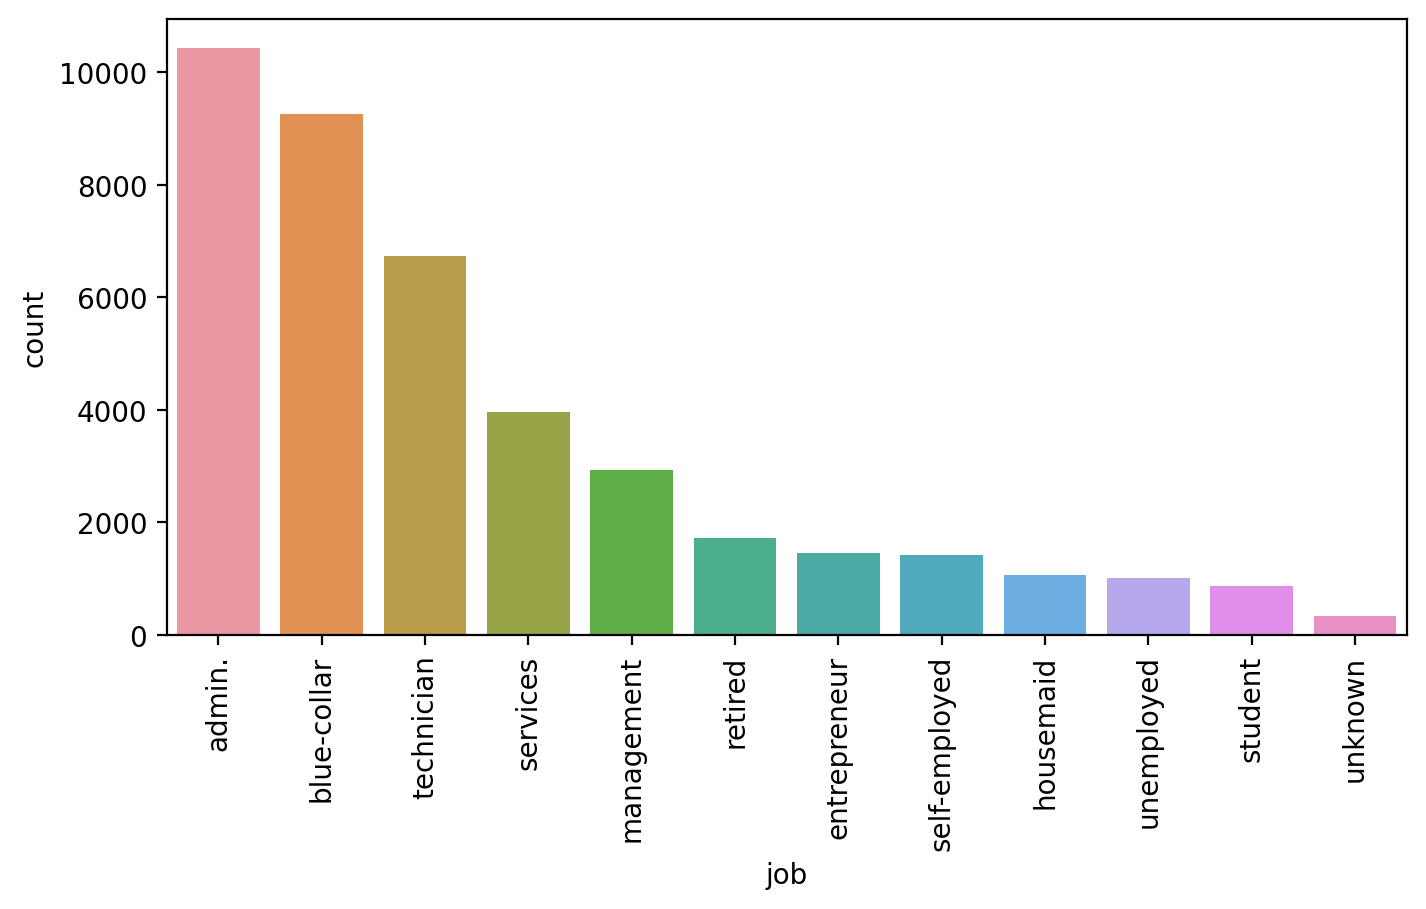

In [26]:
plt.figure(figsize = (8,4), dpi = 200)
sns.countplot(data=df, x= 'job', order = df['job'].value_counts().index)
plt.xticks(rotation = 90);

*Category **Admin** has the highest count following **Blue-collar** and **technicians**, while **unemployed**, **student** and **unknown** are the least in count.*

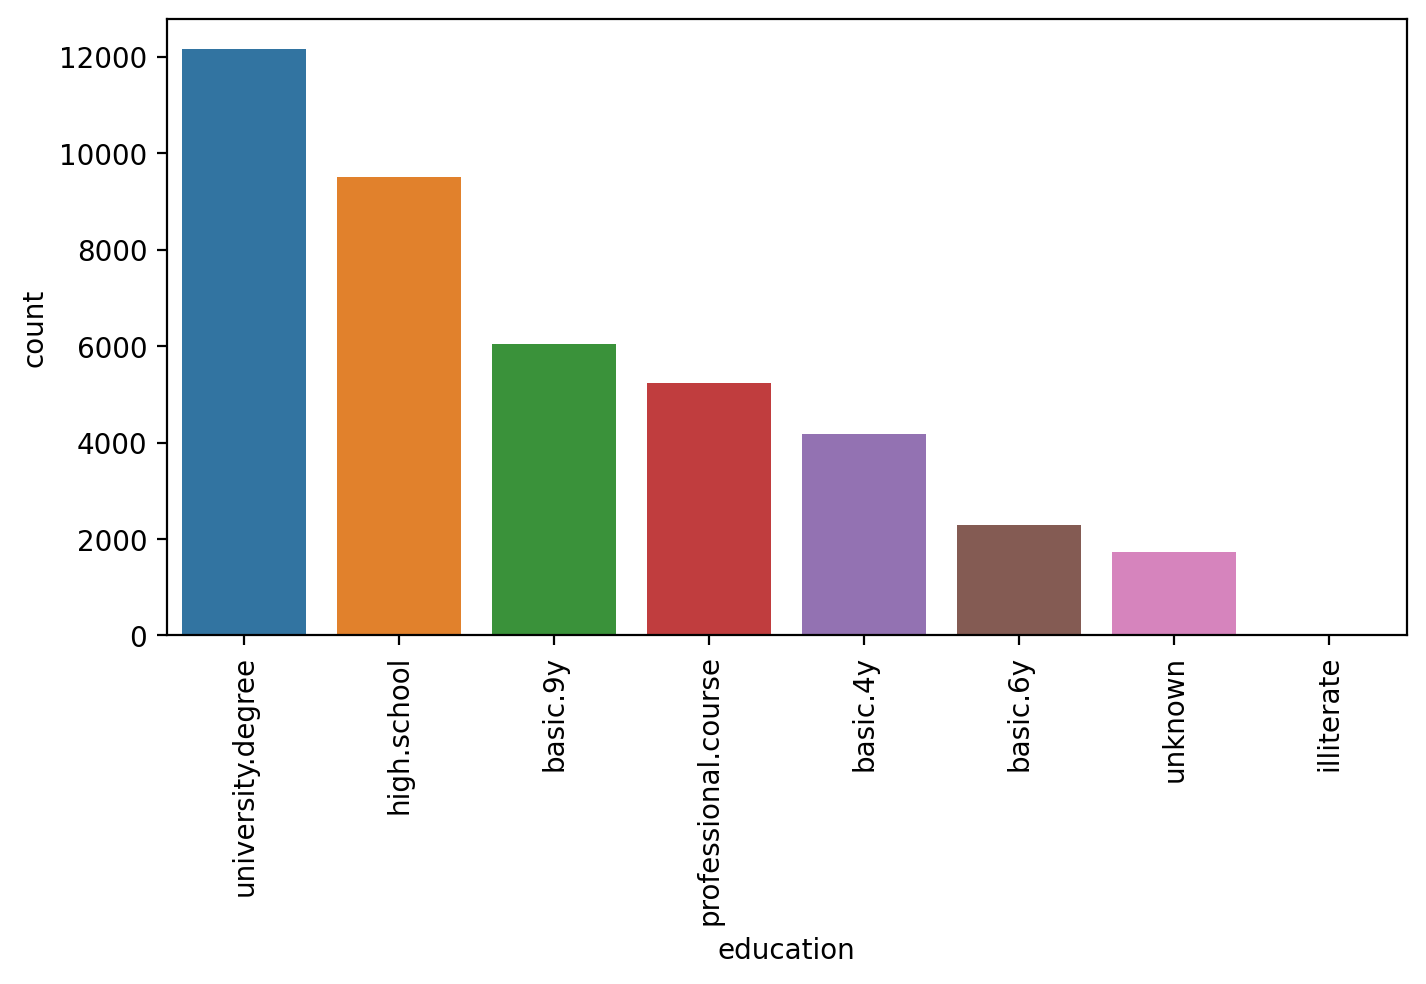

In [27]:
plt.figure(figsize = (8,4), dpi = 200)
sns.countplot(data=df, x= 'education', order = df['education'].value_counts().index)
plt.xticks(rotation = 90);

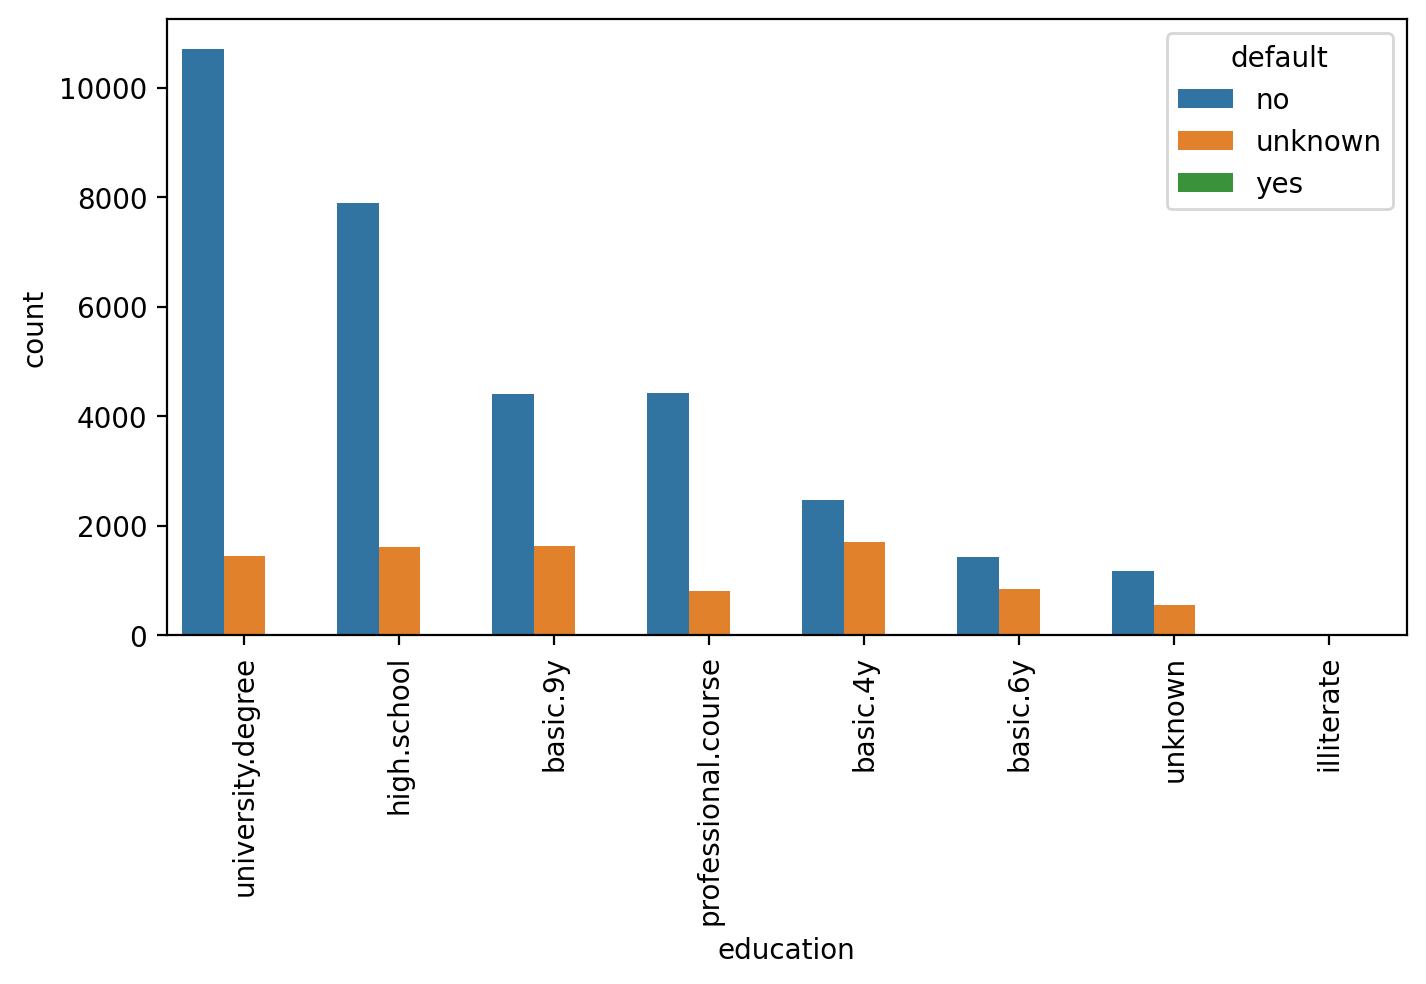

In [28]:
plt.figure(figsize = (8,4), dpi = 200)
sns.countplot(data=df, x= 'education', order = df['education'].value_counts().index, hue = 'default')
plt.xticks(rotation = 90);

*Among those who haven’t defaulted, individuals with a university degree have the highest count.*


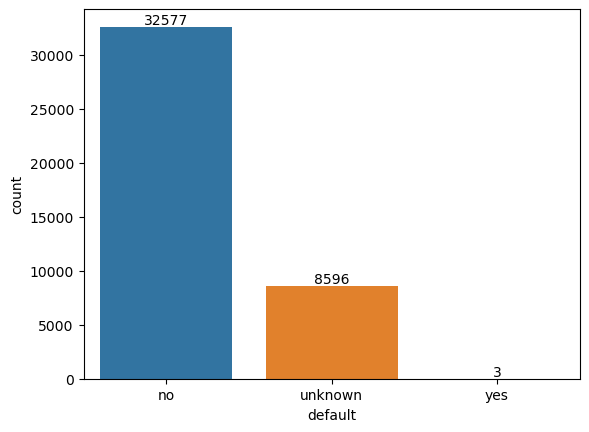

In [29]:
ax = sns.countplot(data=df, x= 'default')

for i in ax.containers:
    ax.bar_label(i)

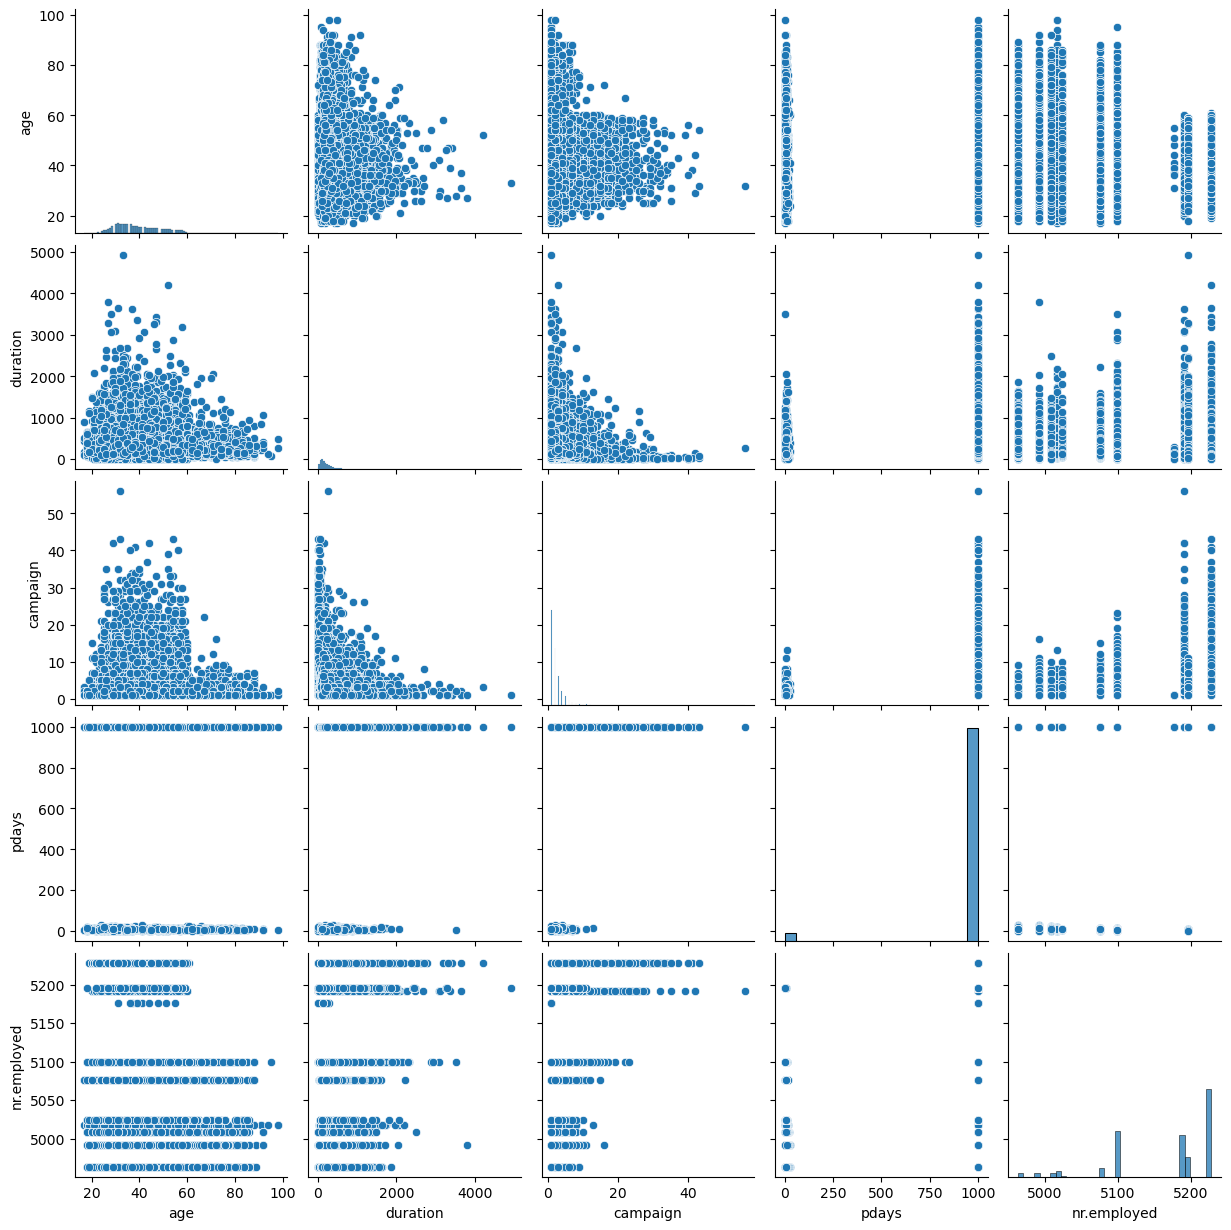

In [30]:
sns.pairplot(data = df[['age', 'job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'poutcome', 'nr.employed', 'y']])

### ML Section

C:\Users\HP\AppData\Local\Temp\ipykernel_7728\1925149320.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

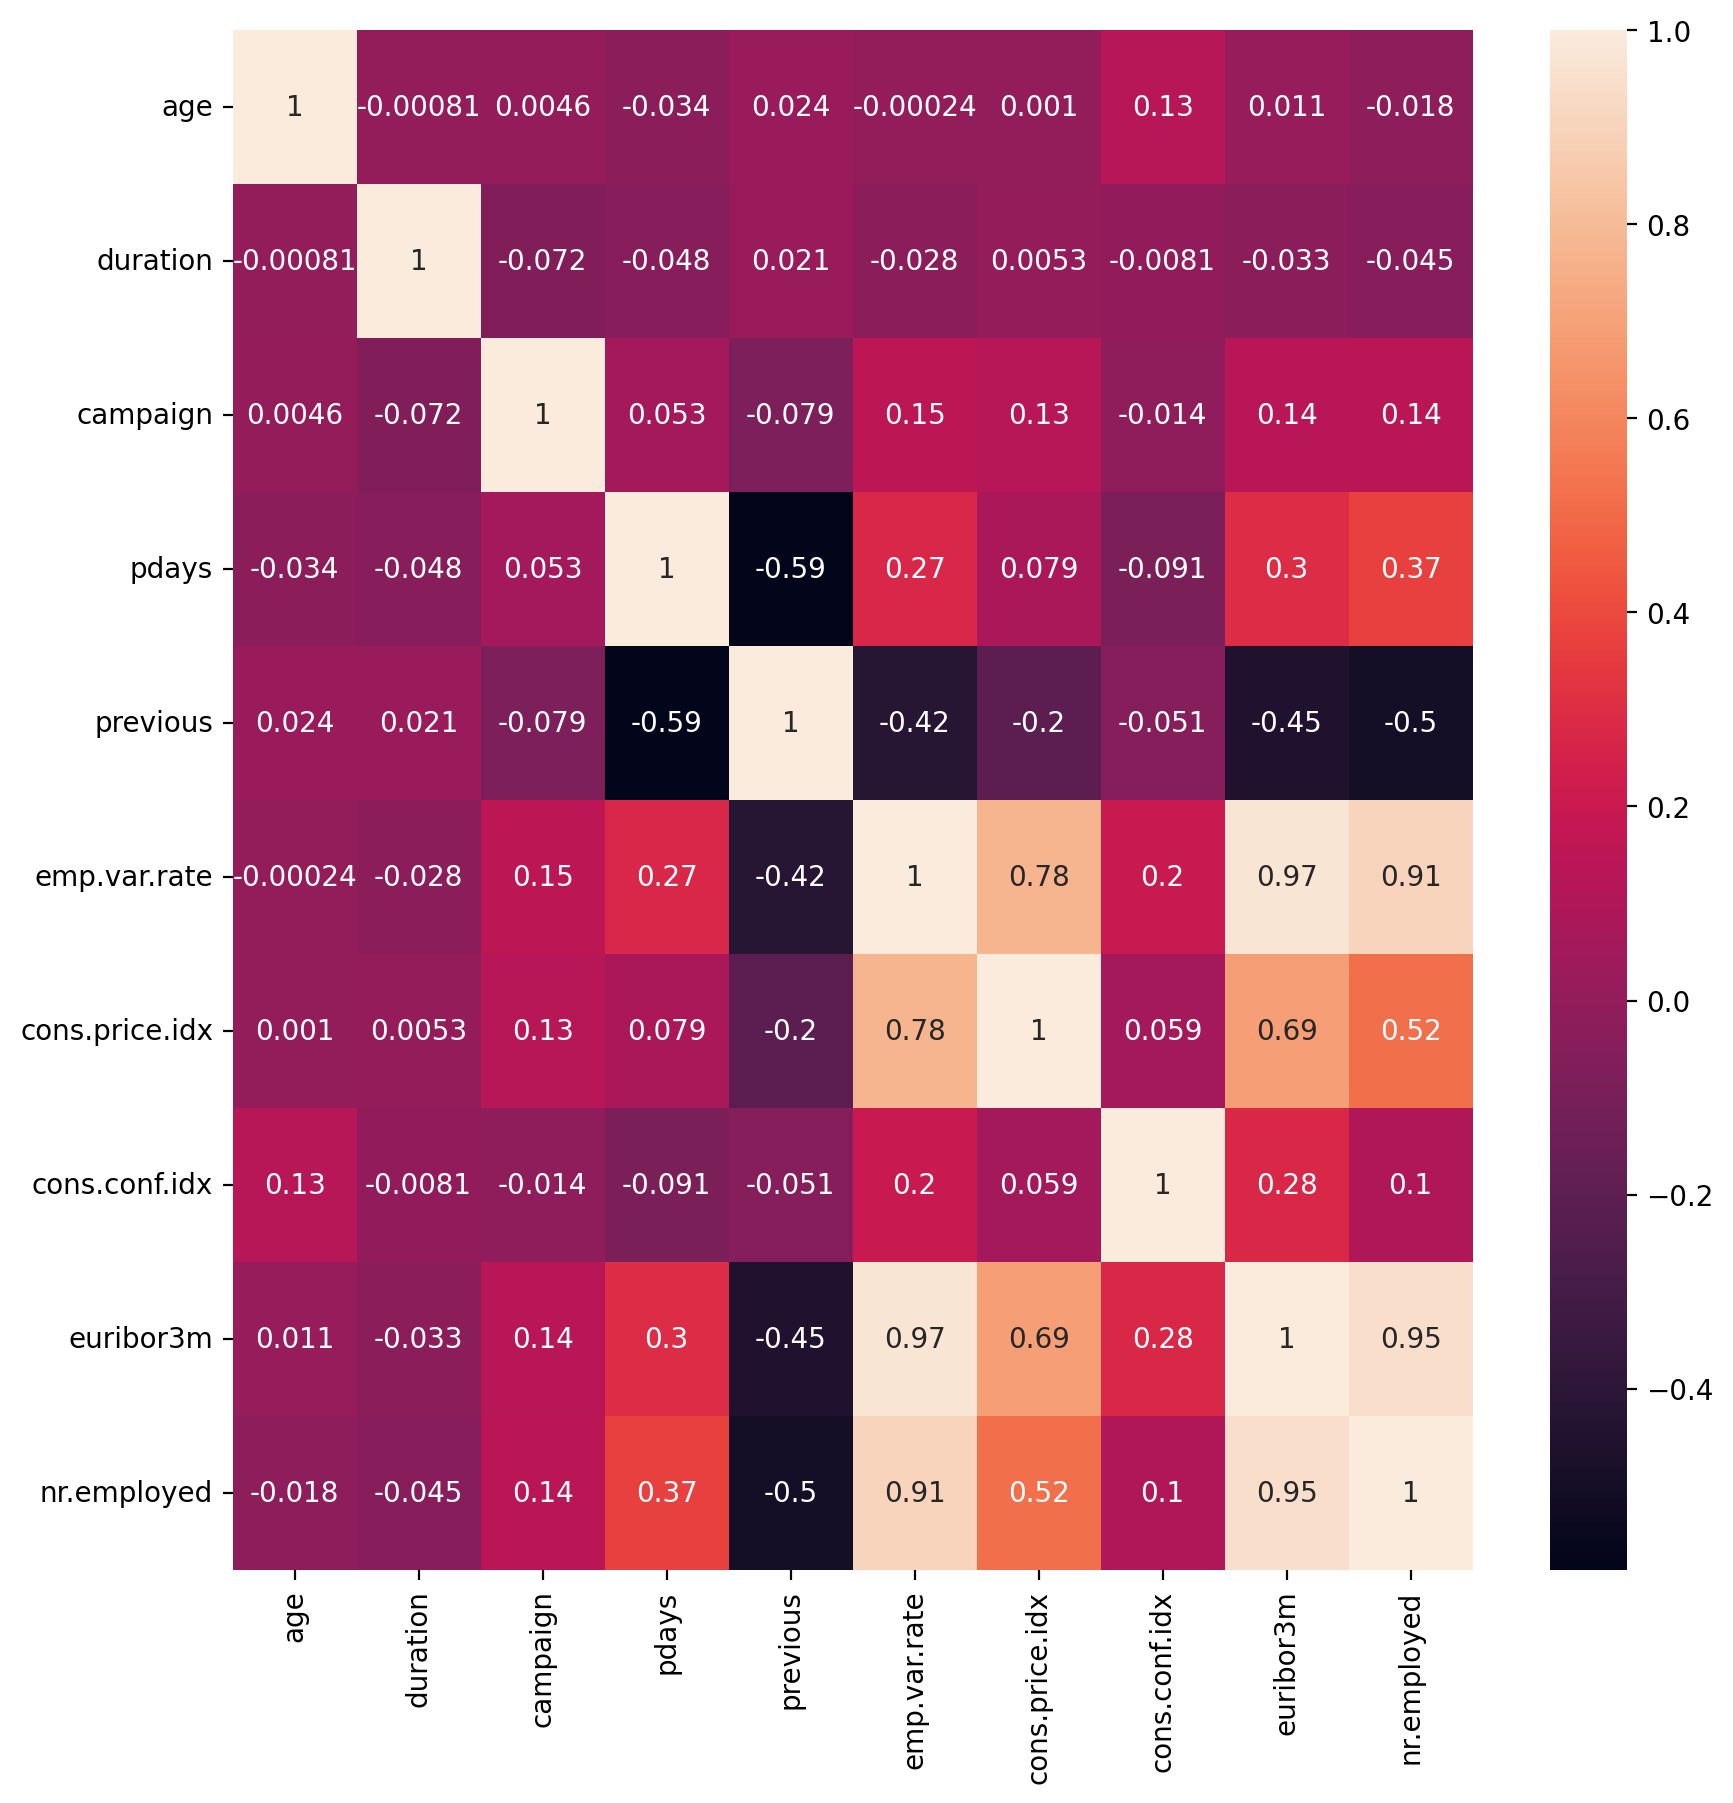

In [31]:
plt.figure(figsize = (10,10), dpi =200)
sns.heatmap(df.corr(), annot = True)

In [32]:
# dropping socio-economic attributes as these are correlated to each other
df = df.drop(['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'emp.var.rate'], axis = 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [33]:
X = df.drop('y', axis = 1)
X = pd.get_dummies(X)

In [34]:
X.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
y = df['y']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [36]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['y']= label_encoder.fit_transform(df['y']) 
  
df['y'].unique() 

array([0, 1])

In [37]:
y = df['y']

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

#### Train/Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Decision Tree Classifier

In [41]:
# Importing Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Creating a model on decision tree classifier
model = DecisionTreeClassifier()

In [43]:
# Fitting the test data to model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# making predictions on base or default model
preds = model.predict(X_test)

In [45]:
# Importing performance metrics to evaluate the model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, f1_score

In [46]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10937
           1       0.47      0.49      0.48      1416

    accuracy                           0.88     12353
   macro avg       0.70      0.71      0.70     12353
weighted avg       0.88      0.88      0.88     12353



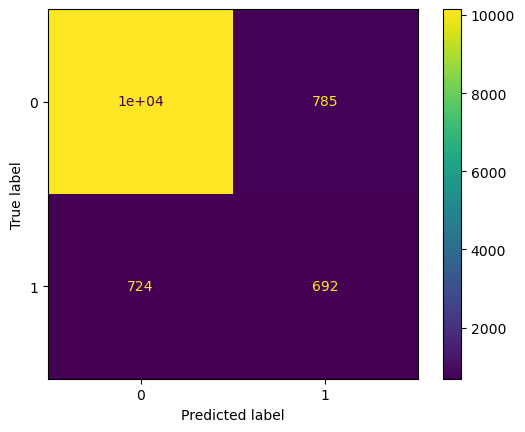

In [47]:
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test);

* **True Negatives (TN):** 10,000
* **False Positives (FP):** 727
* **False Negatives (FN):** 628
* **True Positives (TP):** 751

In [48]:
accuracy_score(y_test, preds)

0.8778434388407674

In [49]:
precision_score(y_test, preds)

0.4685172647257955

In [50]:
recall_score(y_test, preds)

0.4887005649717514

In [51]:
f1_score(y_test, preds)

0.47839612858624264

***The model has decent accuracy but room for improvement in precision and recall.***

### Tuning Hyperparameters

In [52]:
# settting parameters for parameter grid

criterion = ['gini', 'entropy']
max_depth = [2,3,5,8, 10]
max_leaf_nodes = [2,3]
max_features = ['sqrt', 'log2']

param_grid = {'criterion':criterion,
             'max_depth':max_depth,
             'max_leaf_nodes':max_leaf_nodes,
             'max_features':max_features}

In [53]:
# using stratified-k-fold validation
from sklearn.model_selection import StratifiedKFold

In [54]:
skf = StratifiedKFold(n_splits=5)

In [55]:
# Importing GridSearchCV for hyperparameter checking
from sklearn.model_selection import GridSearchCV

In [56]:
# Creating an instance of decision tree classifier 
model = DecisionTreeClassifier()

In [57]:
# setting up GridSearchCV model
grid_model = GridSearchCV(model, param_grid=param_grid, cv = skf, verbose=1)

In [58]:
# Fitting the training data to model
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3]},
             verbose=1)

In [59]:
# Best estimator from the hyperparameter tuning
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=3)

In [60]:
# best score
grid_model.best_score_

0.8951876798479421

In [61]:
# getting predictions based on model
grid_preds = grid_model.predict(X_test)

In [62]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10937
           1       0.67      0.21      0.32      1416

    accuracy                           0.90     12353
   macro avg       0.79      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



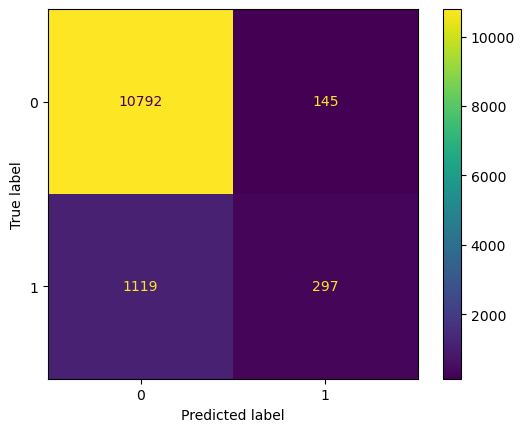

In [63]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [64]:
accuracy_score(y_test, grid_preds)

0.8976766777301061

In [65]:
precision_score(y_test, grid_preds)

0.6719457013574661

In [66]:
recall_score(y_test, grid_preds)

0.2097457627118644

In [67]:
f1_score(y_test, grid_preds)

0.31969860064585576

***We are getting the scores equal to zero (0), it means the model is essentially making random guesses without any meaningful predictive power. Such poor performance could be due to class imbalance.***

### Data Balancing
Since we know that the given dataset is imbalanced, so implementing oversampling technique SMOTE to balance the dataset.

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
smote = SMOTE()

x_smote, y_smote = SMOTE.fit_resample(smote, X= X,y = y)

In [70]:
x_smote.shape

(73074, 58)

In [71]:
y_smote.shape

(73074,)

In [72]:
y_smote.value_counts()

0    36537
1    36537
Name: y, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=101)

In [74]:
smote_model = DecisionTreeClassifier()

In [75]:
smote_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
smote_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [77]:
smote_preds= smote_model.predict(X_test)

In [78]:
print(classification_report(y_test, smote_preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10928
           1       0.92      0.94      0.93     10995

    accuracy                           0.93     21923
   macro avg       0.93      0.93      0.93     21923
weighted avg       0.93      0.93      0.93     21923



<Figure size 1600x1600 with 0 Axes>

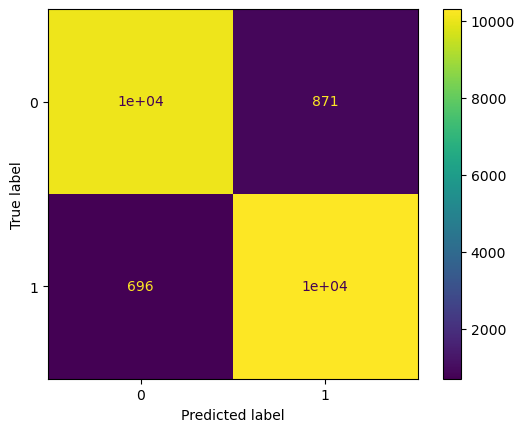

In [79]:
plt.figure(figsize = (8,8), dpi =200)
ConfusionMatrixDisplay.from_estimator(smote_model, X_test, y_test);

In [80]:
accuracy_score(y_test, smote_preds)

0.9285225562194955

In [81]:
precision_score(y_test, smote_preds)

0.9220232766338406

In [82]:
recall_score(y_test, smote_preds)

0.9366984993178717

In [83]:
f1_score(y_test, smote_preds)

0.9293029551094069

***After balancing of the dataset led to a well-performeed model with high accuracy, precision and f1 score.***

In [84]:
# Checking importances of features
feat_import = smote_model.feature_importances_

In [85]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

,Importance
age,0.051096
duration,0.347482
campaign,0.012004
pdays,0.060278
previous,0.005027
job_admin.,0.004402
job_blue-collar,0.003281
job_entrepreneur,0.000869
job_housemaid,0.001501
job_management,0.001842


In [86]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
duration,0.347482
contact_telephone,0.105707
pdays,0.060278
month_nov,0.057740
month_may,0.054061
age,0.051096
month_jul,0.047586
month_aug,0.036741
month_apr,0.035587
contact_cellular,0.031448


In [87]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.005]

In [88]:
imp_feats.sort_values('Importance')

,Importance
previous,0.005027
day_of_week_wed,0.005371
poutcome_failure,0.005874
housing_no,0.006111
day_of_week_thu,0.006418
day_of_week_fri,0.007644
day_of_week_mon,0.007690
month_jun,0.009250
marital_married,0.011152
campaign,0.012004


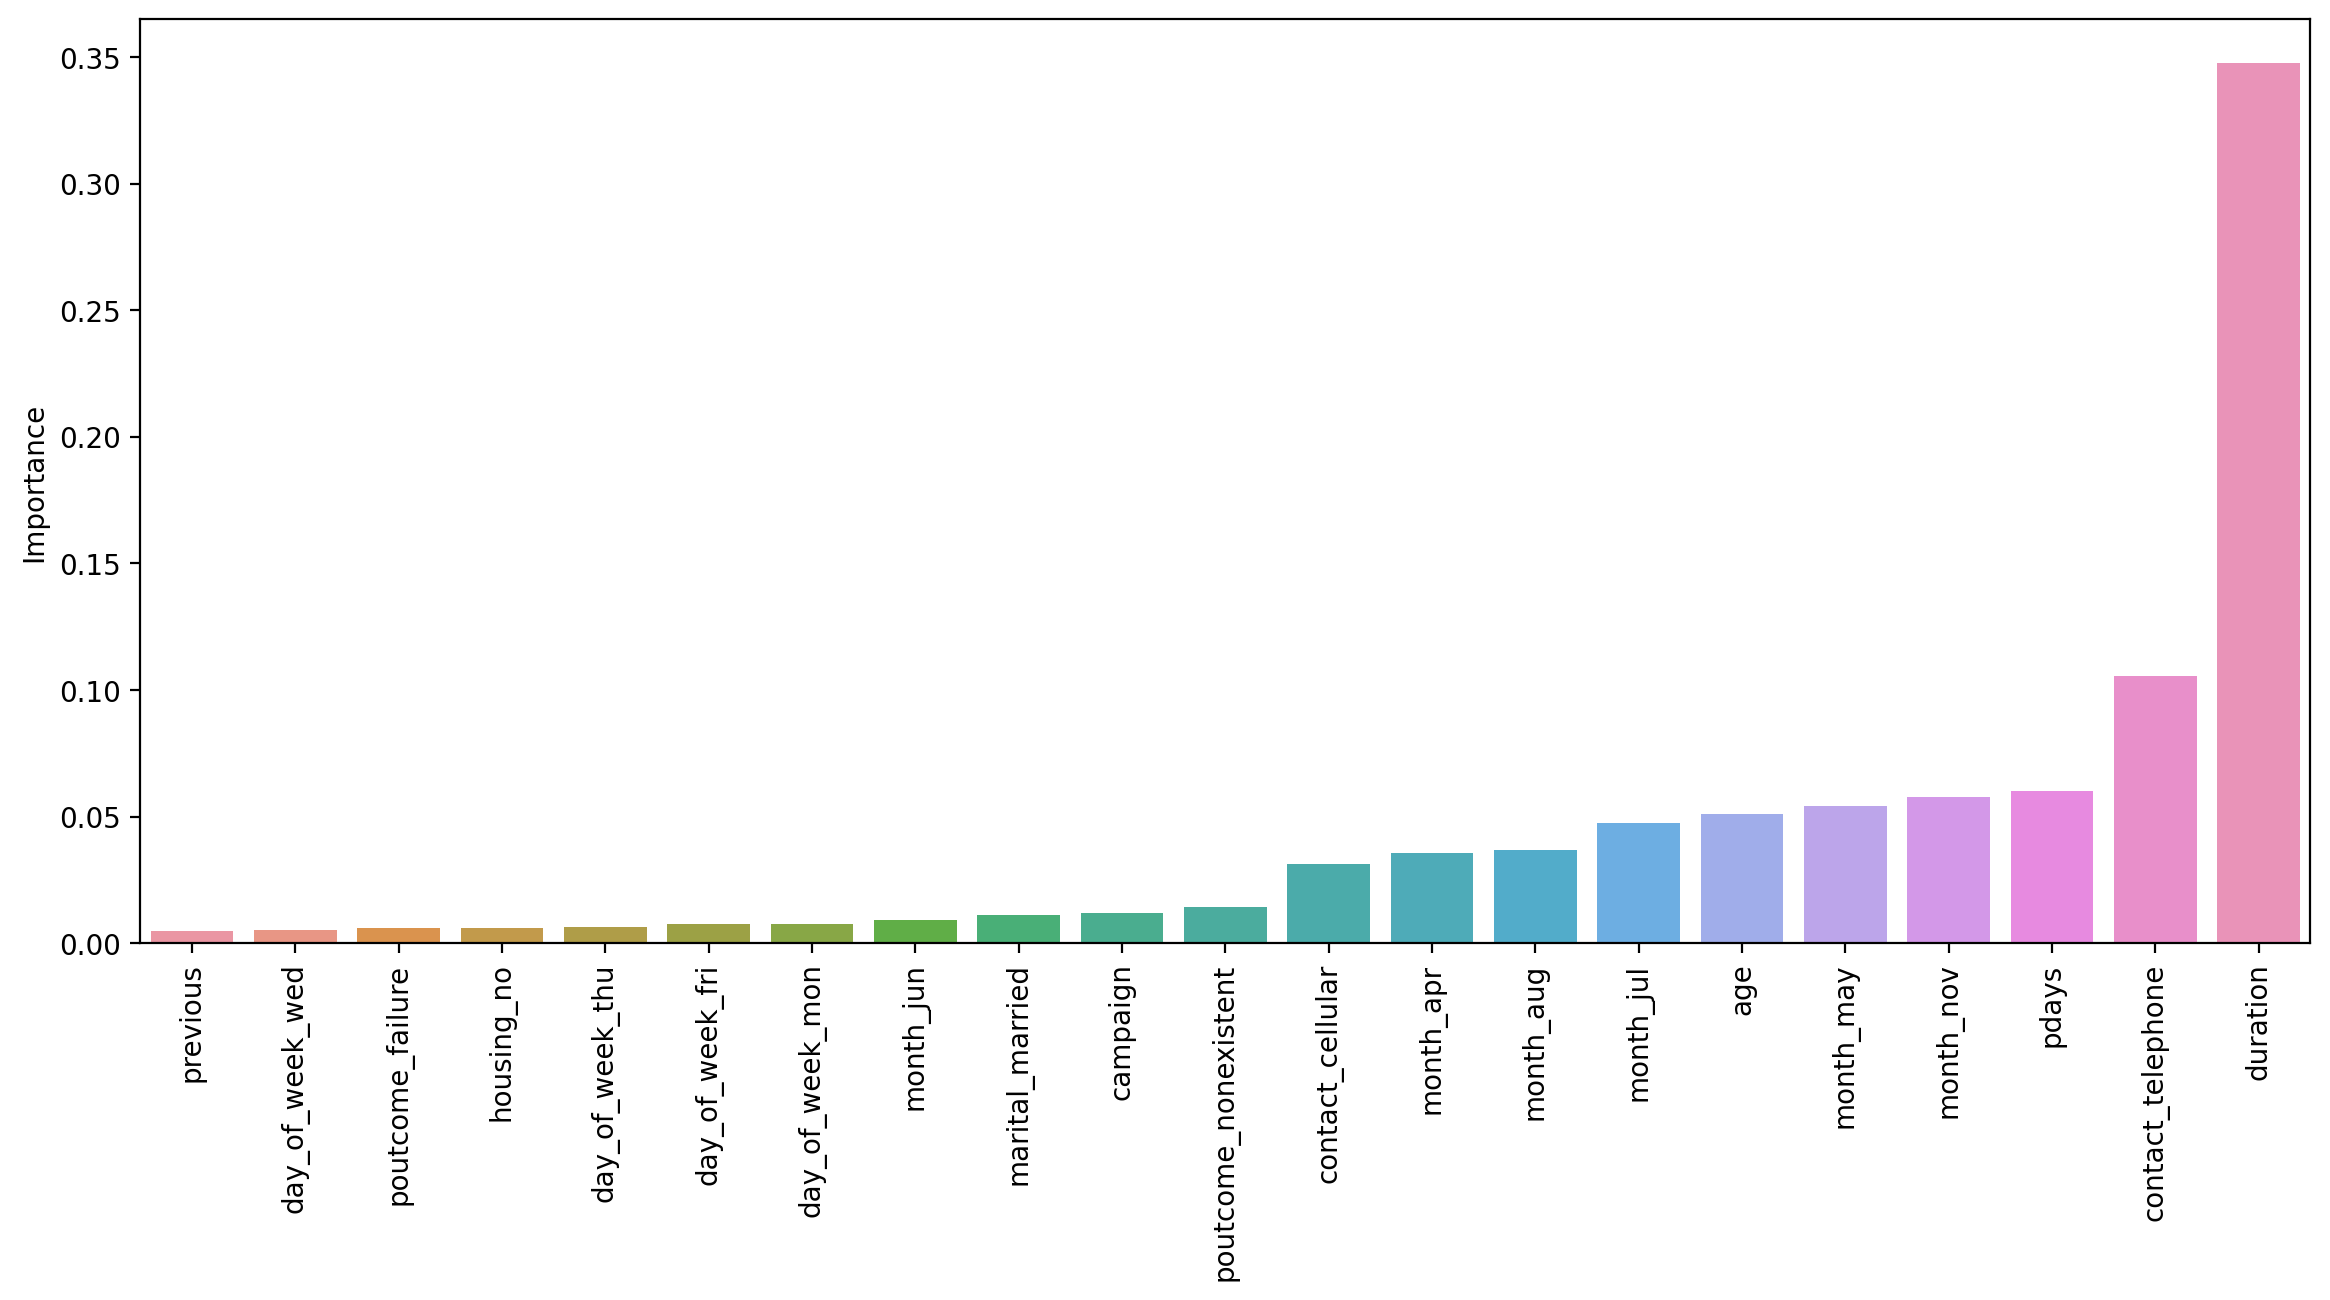

In [89]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);